In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
tesla=yf.Ticker("TSLA")

In [5]:
tesla_data=tesla.history(period="max")

In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data)

In [10]:
soup

<html>
<head>
</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
<h1>We do not allow automated access to our servers.</h1>
<h2></h2><p>Automated access to our data is prohibited by our data provider.</p>
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>
<ul>
<li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
<li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
<li>We will add you to our whitelist within 24 hours</li>
</ul>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}function t(e,t){va

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the user-agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a request to the URL using a session object
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
with requests.Session() as session:
    response = session.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")

    tables = soup.find_all("table")

    # Check if there are tables available
    if len(tables) > 1:

        revenue_table = tables[1]

        rows = revenue_table.find_all("tr")[1:]

        # Extract data from each row
        data = []
        for row in rows:
            row_data = [td.text.strip() for td in row.find_all("td")]
            data.append(row_data)

        tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

        # Display the last five rows
        print(tesla_revenue.tail())
    else:
        print("No tables found on the webpage.")
else:
    print("Failed to retrieve data from the webpage. Status code:", response.status_code)


          Date Revenue
54  2010-06-30     $28
55  2010-03-31     $21
56  2009-12-31        
57  2009-09-30     $46
58  2009-06-30     $27


In [12]:
gme = yf.Ticker("GME")

In [13]:
gme_data = gme.history(period="max")


In [14]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [15]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data)


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the user-agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Send a request to the URL using a session object
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
with requests.Session() as session:
    response = session.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all tables on the page
    tables = soup.find_all("table")

    # Check if there are tables available
    if len(tables) > 1:
        # Extract the revenue table
        revenue_table = tables[1]

        rows = revenue_table.find_all("tr")[1:]

        data = []
        for row in rows:
            row_data = [td.text.strip() for td in row.find_all("td")]
            data.append(row_data)

        # Create the DataFrame
        gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

        # Displaying the last five rows of table
        print(gme_revenue.tail())
    else:
        print("No tables were found on the webpage.")
else:
    print("Failed to retrieve data from the webpage. Status code:", response.status_code)


          Date Revenue
55  2010-01-31  $3,524
56  2009-10-31  $1,835
57  2009-07-31  $1,739
58  2009-04-30  $1,981
59  2009-01-31  $3,492


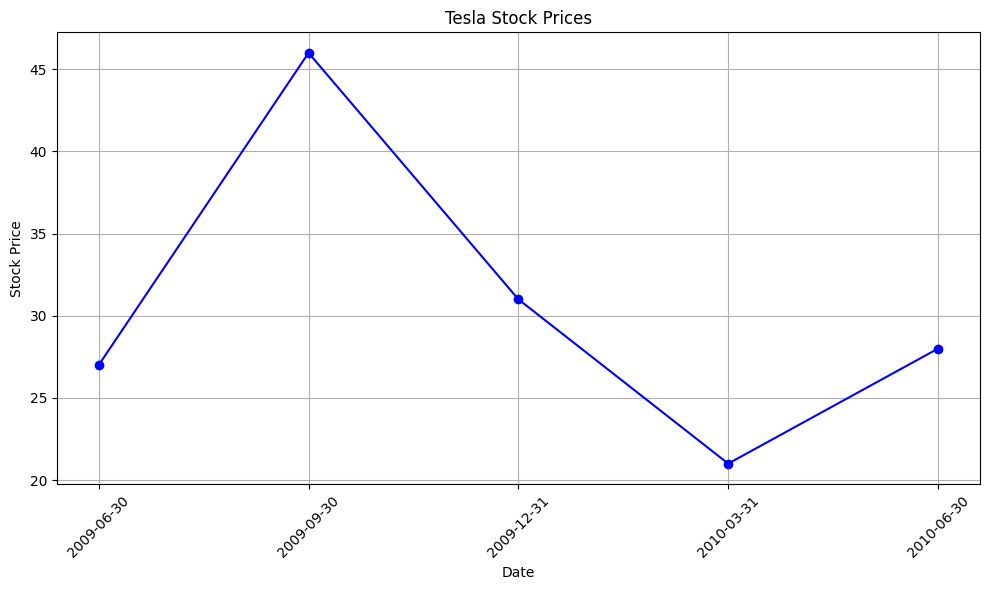

In [21]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
tesla_dates = ['2009-06-30', '2009-09-30', '2009-12-31' ,'2010-03-31', '2010-06-30']
tesla_stock_prices = [27, 46, 31, 21, 28]  # Example Tesla stock prices

def make_graph(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the graph
make_graph(tesla_dates, tesla_stock_prices, 'Tesla Stock Prices')


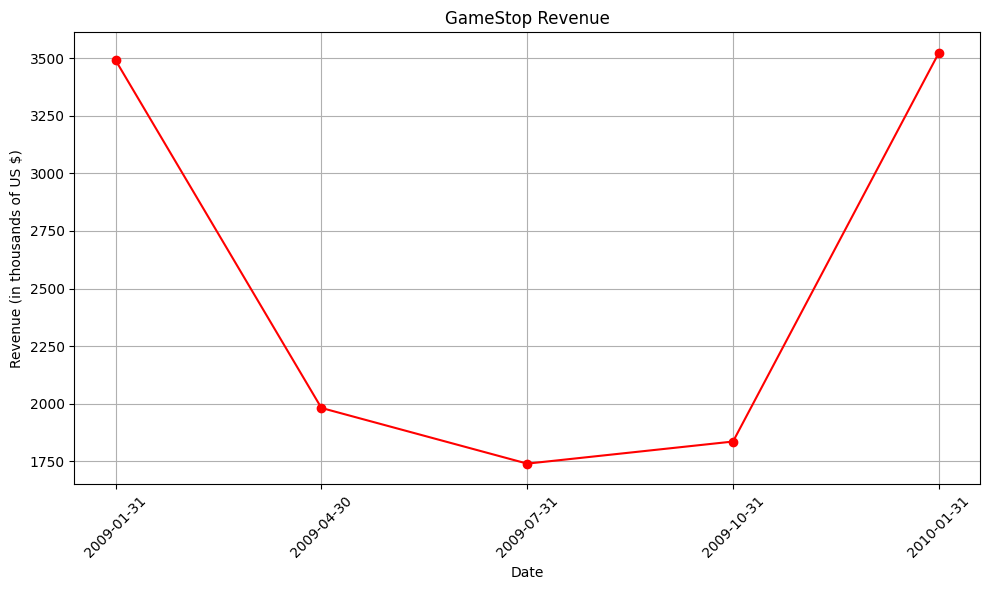

In [22]:
import matplotlib.pyplot as plt

# Provided data
gme_data = ['2010-01-31', '2009-10-31', '2009-07-31', '2009-04-30', '2009-01-31']
gme_revenue = [3524, 1835, 1739, 1981, 3492]  # GameStop revenue (in thousands of US $)

# Reverse the order of the data
gme_data.reverse()
gme_revenue.reverse()

def make_graph(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='r')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenue (in thousands of US $)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the graph
make_graph(gme_data, gme_revenue, 'GameStop Revenue')
